In [1]:
import os
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objects as go
from collections import defaultdict
from ipywidgets import interact
import pandas as pd
import numpy as np
from argparse import Namespace
from tensorboard.backend.event_processing import event_accumulator
from env.VRPInstance import VRPInstance
from env.utils import load_scores, sort_instances

In [2]:
def read_tensorboard_event(folder):
    for file in os.listdir(folder):
        if "events" in file:
            event = event_accumulator.EventAccumulator(os.path.join(folder, file))
            event.Reload()
            return event

In [3]:
def load_all_scores(log_folder):
    data = defaultdict(list)
    for seed in range(1, 21):
        folder = f"{log_folder}/seed_{seed}"
        data["Folder"].append(folder)
        event = read_tensorboard_event(folder)
        steps = event.Scalars("steps")
        running_time = steps[-1].wall_time - steps[0].wall_time
        scores = load_scores(folder)
        keys = sort_instances(scores.keys())
        for key in keys:
            score = scores[key]
            data[key].append(score.score)
        data["Running Time"].append(running_time)
    df = pd.DataFrame(data).set_index(["Folder", "Running Time"])
    return df

In [4]:
df = load_all_scores("logs/dataset_train_data_evrp_wcci_HGS_0.1")
df

,,E-n22-k4.evrp,E-n23-k3.evrp,E-n30-k3.evrp,E-n33-k4.evrp,E-n51-k5.evrp,E-n76-k7.evrp,E-n101-k8.evrp,X-n143-k7.evrp,X-n214-k11.evrp,X-n351-k40.evrp,X-n459-k26.evrp,X-n573-k30.evrp,X-n685-k75.evrp,X-n749-k98.evrp,X-n819-k171.evrp,X-n916-k207.evrp,X-n1001-k43.evrp
Folder,Running Time,,,,,,,,,,,,,,,,,
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_1,4777.062319,386.96126,581.070311,509.470415,840.145836,529.900692,692.640584,838.999651,15878.507622,11028.423360,26293.909724,24350.377828,51330.110609,69170.057532,79009.128426,159688.037118,334086.764824,74097.049611
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_2,4772.085239,386.96126,581.070311,509.470415,840.145836,529.900692,692.640584,838.999651,15878.507622,10991.835317,26291.854814,24401.296265,51232.968824,69162.167980,78939.769705,159664.286691,334807.977320,74777.234071
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_3,4788.849669,386.96126,581.070311,509.470415,840.145836,529.900692,692.640584,838.999651,15877.543245,11036.209690,26222.706953,24359.533890,51323.745530,69196.680572,78797.031108,159395.979528,334195.243513,74516.710550
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_4,4840.699600,386.96126,581.070311,509.470415,840.145836,529.900692,692.640584,838.999651,15878.507622,11047.116376,26279.329996,24429.311595,51335.805890,69110.276403,78895.017262,159686.301649,334421.682387,74160.609178
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_5,4717.080919,386.96126,581.070311,509.470415,840.145836,529.900692,692.640584,838.999651,15865.497629,11019.991970,26272.968383,24317.276068,51322.107675,69169.174429,78914.961688,159519.488654,334786.449322,74571.185860
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_6,4629.198482,386.96126,581.070311,509.470415,840.145836,529.900692,692.640584,838.999651,15878.507622,11011.418661,26259.592477,24492.686272,51600.763256,69206.542586,79004.193907,159803.080039,334728.625334,74618.633489
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_7,4876.168765,386.96126,581.070311,509.470415,840.145836,529.900692,692.640584,838.999651,15880.762189,11038.621374,26325.946051,24337.671221,51591.294127,69201.737251,78955.224600,159459.504157,334664.845132,74504.761369
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_8,4933.962519,386.96126,581.070311,509.470415,840.145836,529.900692,692.640584,838.999651,15880.762189,11032.831939,26172.752148,24333.774901,51346.730288,69109.189704,78747.828025,159705.721389,334729.089269,74674.154955
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_9,4885.769333,386.96126,581.070311,509.470415,840.145836,529.900692,692.640584,838.999651,15880.762189,11015.893882,26256.652125,24426.615178,51396.844373,69071.377247,79012.540685,159763.576515,334281.856975,74612.072444


In [23]:
def plot_instance(key):
    best_folder, _ = df[key].idxmin()
    solution = load_scores(best_folder)[key].solution
    args = Namespace(round_int=False, algo=None)
    instance = VRPInstance.from_path(f"dataset/train/data_evrp_wcci/{key}", args, f"sub_{key}")
    instance.name = key
    instance.solution = solution
    fig = instance.plot()
    fig.show()
    # fig.show("svg")
    # return fig.to_image("svg")

plot_instance("E-n22-k4.evrp")
# fig.add_image(plot_instance("E-n22-k4.evrp"))

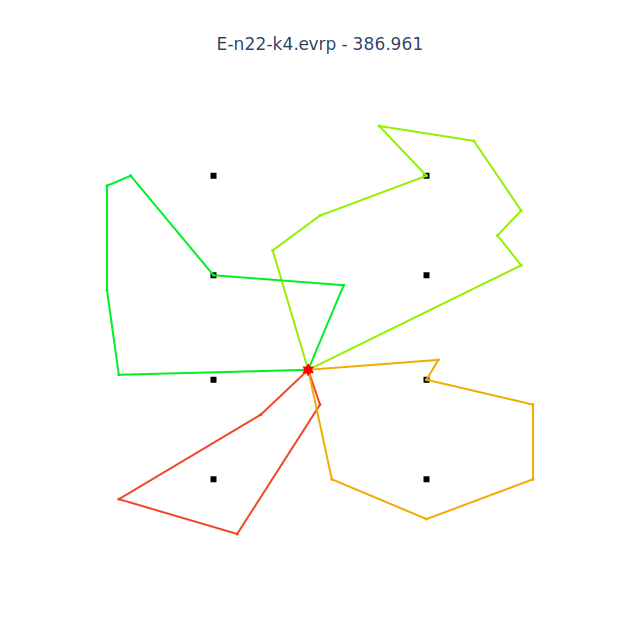

In [6]:
plot_instance("E-n22-k4.evrp")

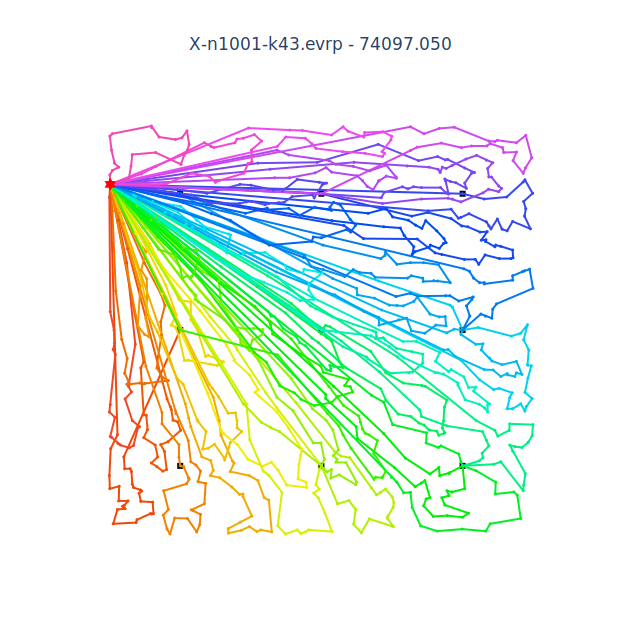

In [7]:
plot_instance("X-n1001-k43.evrp")